In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("YoutubeCommentsDataSet.csv")
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [4]:
df.describe().T

,count,unique,top,freq
Comment,18364,17871,one of the best thing about dude is that he ne...,10
Sentiment,18408,3,positive,11432


In [6]:
df.duplicated().sum()

531

In [7]:
df.drop_duplicates(subset=['Comment'],inplace=True)

In [8]:
df.isnull().sum()

Comment      1
Sentiment    0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df['Sentiment'].value_counts()

Sentiment
positive    11052
neutral      4502
negative     2317
Name: count, dtype: int64

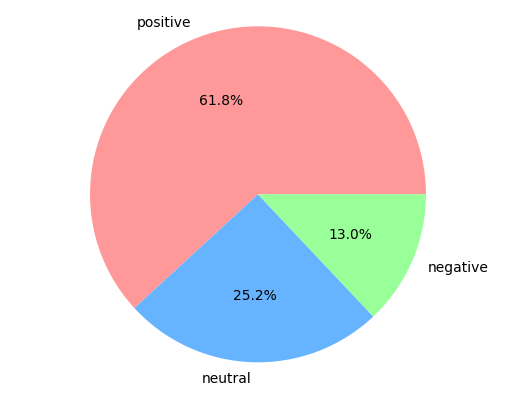

In [11]:
# lets check through pie chart
# labels = ['ham', 'spam']
labels = df['Sentiment'].value_counts().index
sizes = df['Sentiment'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

In [12]:
df['Sentiment'] = df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
df.head()

C:\Users\Hany Medhat\AppData\Local\Temp\ipykernel_22904\2927737834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'] = df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2


C:\Users\Hany Medhat\AppData\Local\Temp\ipykernel_22904\3898544357.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Sentiment",  palette="Dark2", edgecolor="black", linewidth=1.5)


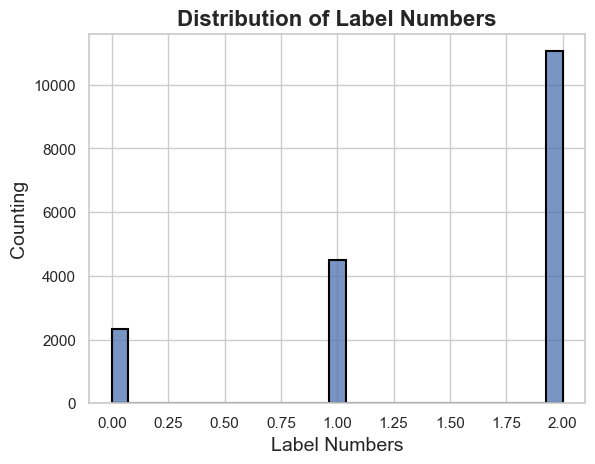

In [13]:
# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="Sentiment",  palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()

This commit addresses the issue of class imbalance in the classification model, which was leading to biased predictions. The changes implemented include:
- Oversampling the minority class to balance the training data.
- Adjusting decision thresholds to improve sensitivity towards the minority class.
- Evaluating the model using metrics that are robust to class imbalance, such as F1-score.

These changes have resulted in a more balanced model with improved performance across all classes

In [14]:
df.drop(df[df['Sentiment'] == 1].index[2317:],  inplace=True)
df.drop(df[df['Sentiment'] == 2].index[2317:],  inplace=True)
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2
...,...,...
18210,teacher bot cant teach but it can test did you...,0
18233,its not always that you want an unlimited data...,0
18257,dissapointed you did not animate a 13000dimens...,0
18359,in my eyes the second con is the worst thing t...,0


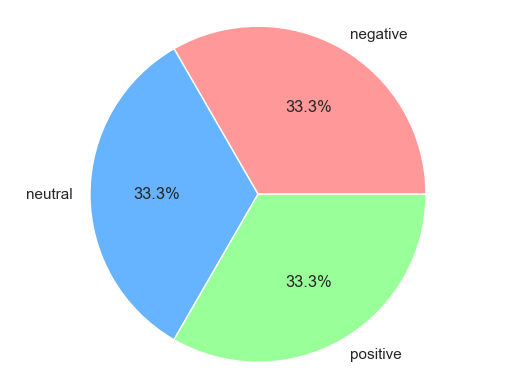

In [15]:
# lets check through pie chart
# labels = df['Sentiment'].value_counts().index
labels = ['negative', 'neutral', 'positive']
sizes = df['Sentiment'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

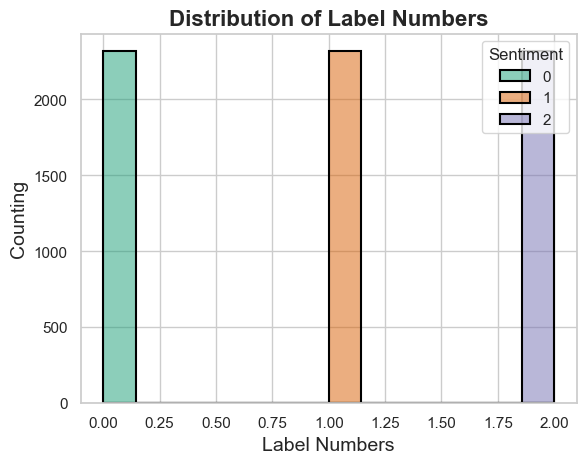

In [16]:
# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="Sentiment",hue="Sentiment",  palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()

In [17]:
# Create the function to preprocess the text
def clean_text(text):
    
    # Remove the punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the words
    words = text.split()
    
    # Remove stopwords and apply stemming (the library we use)
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['Comment'].apply(clean_text)

In [18]:
tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform(df["clean_text"])
y=df["Sentiment"]

In [19]:
X_train, X_text, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [24]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [25]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "LogisticRegression": lg,
    "KNN": knn,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "XGBoost": xgb,
}

best_results = {}
best_model_name = None
best_accuracy = 0.0 

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training  the model
    y_pred = model.predict(X_text)  # Predict on the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    best_results[name] = accuracy  # Store accuracy in the results dictionary

    # Display accuracy and classification report for the current model
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Display the model with the best accuracy at the end
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")

Naive Bayes Accuracy: 0.69
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       463
           1       0.82      0.37      0.51       464
           2       0.68      0.84      0.75       464

    accuracy                           0.69      1391
   macro avg       0.71      0.69      0.66      1391
weighted avg       0.71      0.69      0.66      1391

SVM Accuracy: 0.70
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       463
           1       0.59      0.73      0.66       464
           2       0.87      0.67      0.76       464

    accuracy                           0.70      1391
   macro avg       0.72      0.70      0.70      1391
weighted avg       0.72      0.70      0.70      1391

LogisticRegression Accuracy: 0.70
--------------------------------------------------

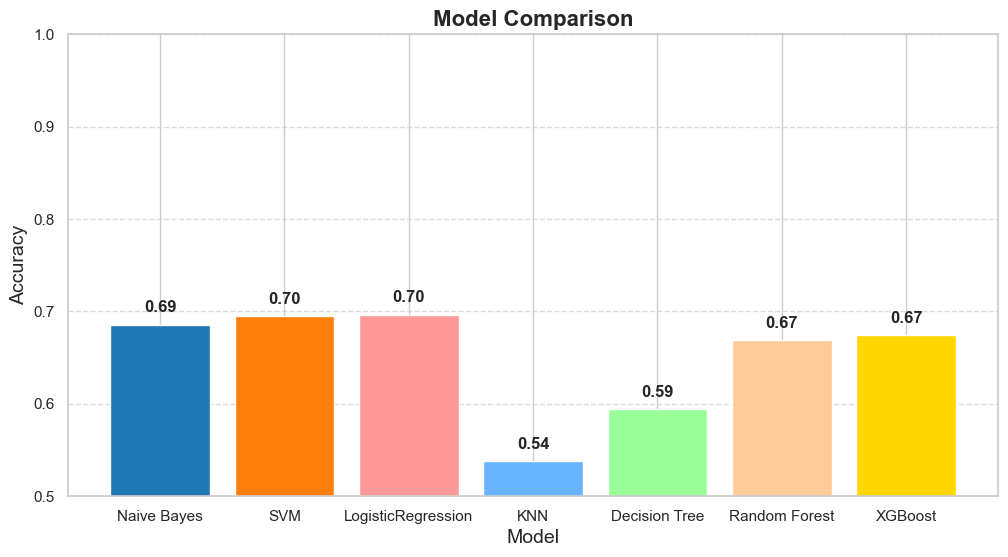

In [26]:
# Visualize the models Accuracy 

# Define a color palette
colors = ['#1f77b4', '#ff7f0e','#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
import pickle
model = models['LogisticRegression']
with open('BestModel.pkl', 'wb') as file:
    pickle.dump(model, file)